In [8]:
import pandas as pd

df = pd.read_csv(r'C:\Users\alimc\anaconda3\ViewingActivity.csv')

In [11]:
df.shape

(40198, 10)

In [13]:
df.head(1)

,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country
0,Dera,2025-01-09 03:54:43,00:00:09,NaN,Unstable: Season 1: Unstable (Episode 1),NaN,Android DefaultWidevineL3Phone Android Phone,00:00:12,00:00:12,US (United States)


In [15]:
df = df.drop(['Attributes', 'Supplemental Video Type', 'Device Type', 'Bookmark', 'Latest Bookmark', 'Country'], axis=1)
df.head(1)

,Profile Name,Start Time,Duration,Title
0,Dera,2025-01-09 03:54:43,00:00:09,Unstable: Season 1: Unstable (Episode 1)


In [17]:
df.dtypes

Profile Name    object
Start Time      object
Duration        object
Title           object
dtype: object

In [19]:
df['Start Time'] = pd.to_datetime(df['Start Time'], utc=True)
df.dtypes

Profile Name                 object
Start Time      datetime64[ns, UTC]
Duration                     object
Title                        object
dtype: object

In [21]:
df['Start Time'] = pd.to_datetime(df['Start Time'], utc=True)
df.dtypes

Profile Name                 object
Start Time      datetime64[ns, UTC]
Duration                     object
Title                        object
dtype: object

In [23]:
# change the Start Time column into the dataframe's index
df = df.set_index('Start Time')

# convert from UTC timezone to eastern time
df.index = df.index.tz_convert('US/Eastern')

# reset the index so that Start Time becomes a column again
df = df.reset_index()

#double-check that it worked
df.head(1)

,Start Time,Profile Name,Duration,Title
0,2025-01-08 22:54:43-05:00,Dera,00:00:09,Unstable: Season 1: Unstable (Episode 1)


In [25]:
df['Duration'] = pd.to_timedelta(df['Duration'])
df.dtypes

Start Time      datetime64[ns, US/Eastern]
Profile Name                        object
Duration                   timedelta64[ns]
Title                               object
dtype: object

In [27]:
office = df[df['Title'].str.contains('The Flash', regex=False)]

In [29]:
office.shape

(321, 4)

In [31]:
office = office[(office['Duration'] > '0 days 00:01:00')]
office.shape

(268, 4)

In [33]:
office['Duration'].sum()


Timedelta('4 days 17:03:43')

In [35]:
office['weekday'] = office['Start Time'].dt.weekday
office['hour'] = office['Start Time'].dt.hour

# check to make sure the columns were added correctly
office.head(1)

,Start Time,Profile Name,Duration,Title,weekday,hour
4728,2021-07-01 12:30:09-04:00,Dindu,0 days 00:29:38,The Flash: Season 1: The Flash Is Born (Episod...,3,12


In [37]:
%matplotlib inline
import matplotlib

<Axes: title={'center': 'Flash Episodes Watched by Day'}, xlabel='weekday'>

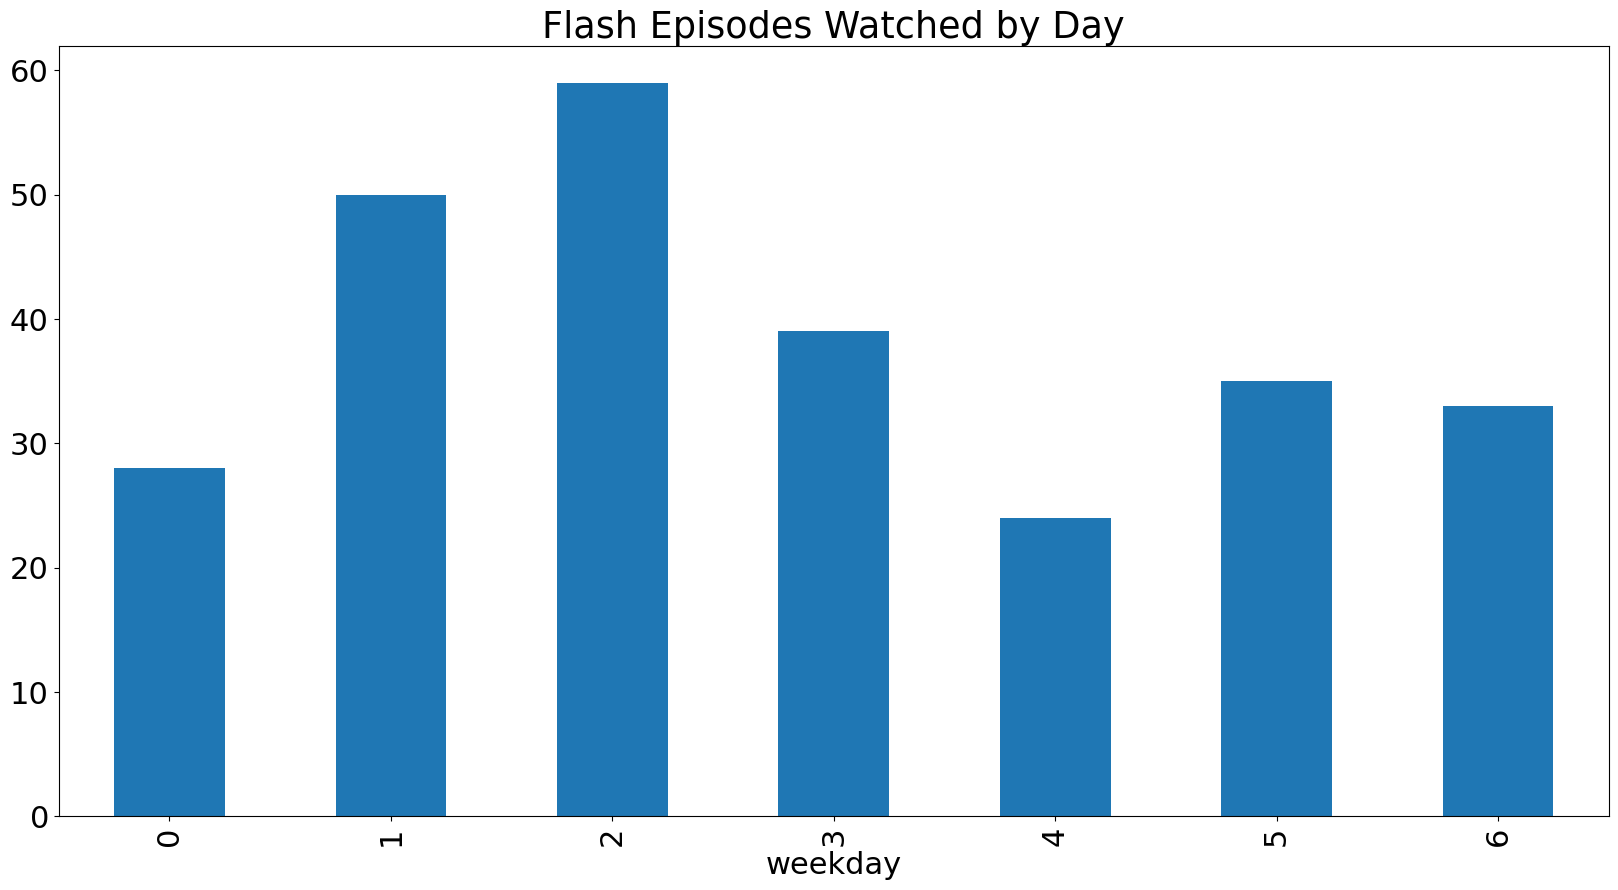

In [39]:
# set our categorical and define the order so the days are plotted Monday-Sunday
office['weekday'] = pd.Categorical(office['weekday'], categories=
    [0,1,2,3,4,5,6],
    ordered=True)

# create office_by_day and count the rows for each weekday, assigning the result to that variable
office_by_day = office['weekday'].value_counts()

# sort the index using our categorical, so that Monday (0) is first, Tuesday (1) is second, etc.
office_by_day = office_by_day.sort_index()

# optional: update the font size to make it a bit larger and easier to read
matplotlib.rcParams.update({'font.size': 22})

# plot office_by_day as a bar chart with the listed size and title
office_by_day.plot(kind='bar', figsize=(20,10), title='Flash Episodes Watched by Day')

<Axes: title={'center': 'Flash Episodes Watched by Hour'}, xlabel='hour'>

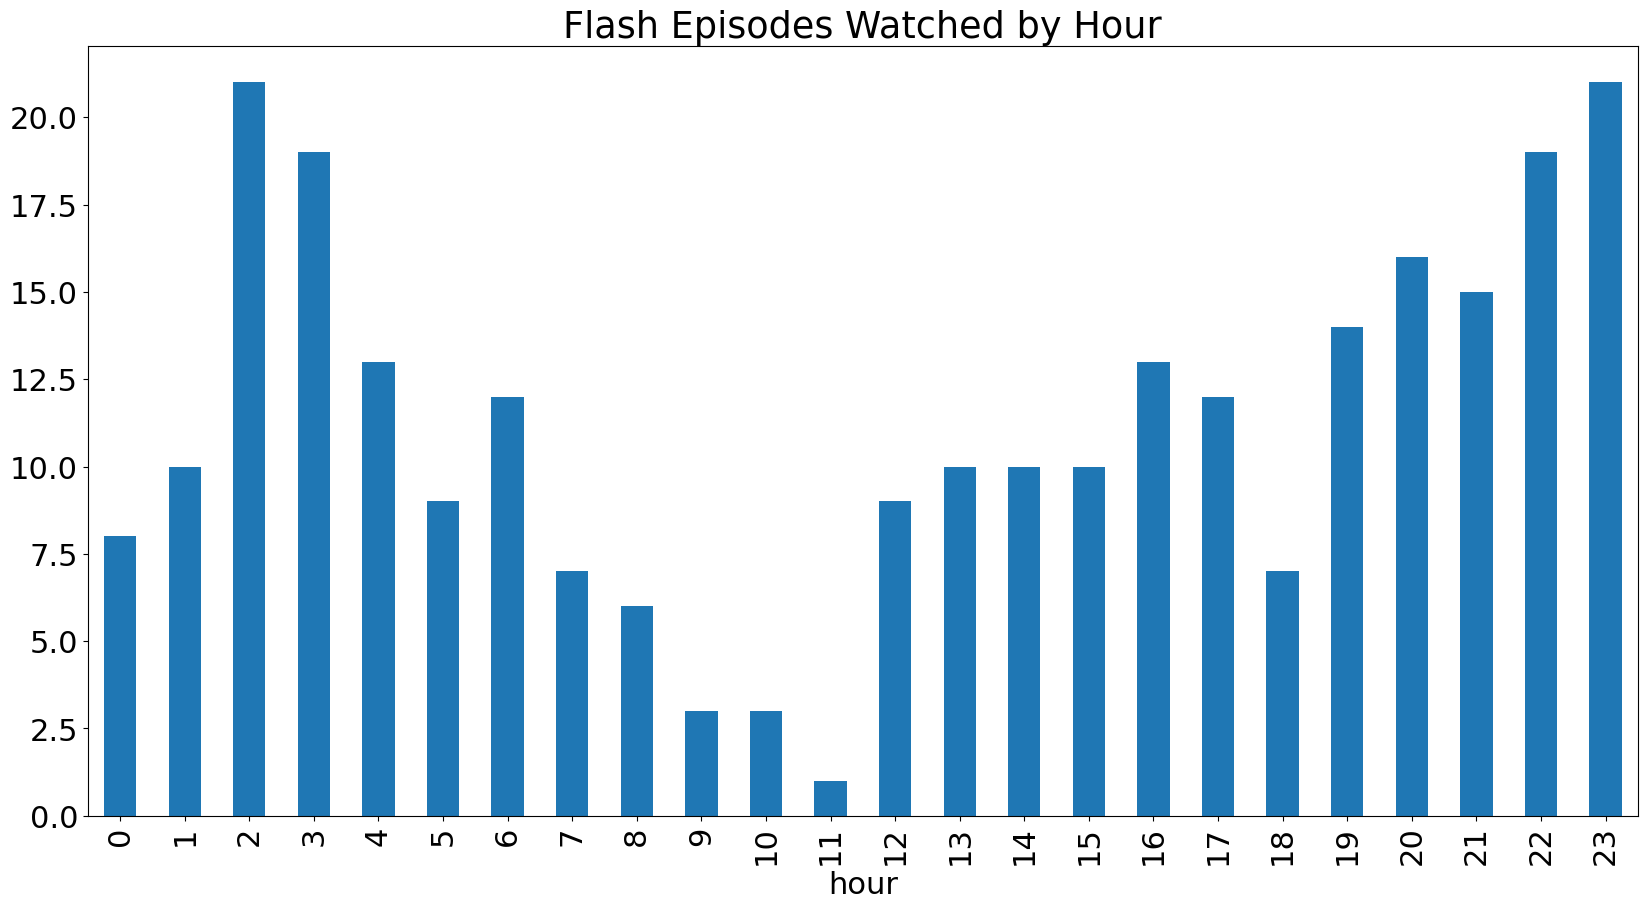

In [41]:
office['hour'] = pd.Categorical(office['hour'], categories=
    [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23],
    ordered=True)

# create office_by_hour and count the rows for each hour, assigning the result to that variable
office_by_hour = office['hour'].value_counts()

# sort the index using our categorical, so that midnight (0) is first, 1 a.m. (1) is second, etc.
office_by_hour = office_by_hour.sort_index()

# plot office_by_hour as a bar chart with the listed size and title
office_by_hour.plot(kind='bar', figsize=(20,10), title='Flash Episodes Watched by Hour')